# Innlevering 2 &mdash; Logistisk differensligning

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Innleveringsfrist: **03. oktober 2025, klokka 16.00**

---

_Du **skal** levere besvarelsen din som en pdf-fil i <a href="https://ovsys.math.ntnu.no/login/?next=/">Ovsys</a>. Der skal du også legge ved all kode du eventuelt bruker._ 

_Du kan ta utgangspunkt i denne Jupyter notebook-en, endre den, lagre den som pdf, og levere den inn._

---

Ei ligning på formen 

$$
u_{n+1} = u_n + f(u_n)
$$

er et eksempel på en rekursjon. 
<p><p>
Funksjonen $f(x)$ gir endringen fra $u_n$ til $u_{n+1}$,
og i denne innleveringa skal vi studere følger $\{u_n\}_{n=0}^\infty$ gitt ved en initialverdi $u_0$ og en rekursjon.
I en typisk biologibok vil forfatteren bruke bakterievekst som motiverende eksempel &ndash;
en gjennomsnittlig E. Coli-bakterie deler seg omtrent hvert tjuende minutt ved kroppstemperatur, 
så om $u_n$ er E. Coli-bestanden ved ett tidspunkt, 
er $u_{n+1}$ bestanden tjue minutter senere. Se <a href="https://www.youtube.com/watch?v=gEwzDydciWc">her</a> for en illustrasjon.


<ol type="1." start="1.">
<li> Hva blir $f(x)$ dersom $u_{n+1}$ skal være dobbelt så stor som $u_n$?
<p><p>    
</li>
</ol>


Nå deler ikke bakterier seg på sekundet hvert tjuende minutt,
så en bedre modell er å sette $f(x)=r x$, 
slik at 

$$
u_{n+1} = (1+r)u_n
$$

og så kan man bestemme vekstraten $r$ empirisk under forskjellige kontrollerte forhold &ndash; 
temperatur og mattilgang og så videre.
I TMA4400 har vi ikke tilgang på lab, 
så vi får fikle litt med python istedet.  
<p><p>
Under finner du pythonkode for å plotte $(n,u_n)$ der $n\in\{0,1,2,\ldots\}$ gitt $u_0$ og $r$. 

<ol type="1." start="2.">
<li>Sett $u_0=1$ og plott følgen for $r=-1/2$, $r=0$ og $r=1/2$. 
<p><p>
</li>
</ol>

[2.50e-01 5.00e-01 1.00e+00 2.00e+00 4.00e+00 8.00e+00 1.60e+01 3.20e+01
 6.40e+01 1.28e+02 2.56e+02]


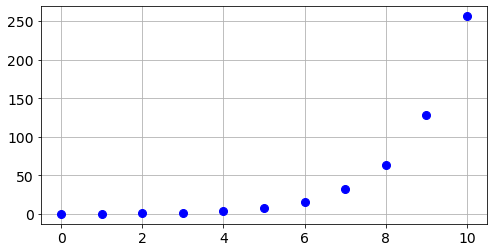

In [1]:
# pakkene vi trenger
%matplotlib inline
import math # vi trenger tilgang til sinus-funksjonen math.sin() 
import numpy as np
import matplotlib.pyplot as plt

# høyresida i rekursjonen
def f(x,r):
    return (1+r)*x

# beregner følgen
def beregn_folge(
r, # vekstfaktor
u0, # initialverdi
nmax # antall iterasjoner
):
    u = np.zeros(nmax+1) # vi begynner med en vektor som har nuller overalt
    u[0] = u0
    for i in range(0, nmax):
        u[i+1] = f(u[i],r)
    
    return u # returnerer en vektor som representerer følgen

# lager plot
def plott_folge(u):
    naturlige_tall = np.arange(0.0, len(u), 1)

    # fikser litt på pyplot
    newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
    'lines.markersize': 8, 'lines.linewidth': 2,
    'font.size': 14}
    plt.rcParams.update(newparams)

    plt.plot(naturlige_tall, u, 'bo') # plotter følgen for gitt vektor u

u = beregn_folge(r=1, u0=.25, nmax=10)
plott_folge(u) 
print(u)

Thomas Malthus påpekte i <a href="https://en.wikipedia.org/wiki/An_Essay_on_the_Principle_of_Population">"An Essay on the Principle of Population"</a> at organismer har en lei tendens til å formere seg eksponensielt fra generasjon til generasjon,
og siden matproduksjonskapasiteten i et typisk jordbrukssamfunn ikke øker eksponensielt over tid, 
mente han at Homo Sapiens var dømt til gjentagende sultkatastrofer. 
Dette essayet var viktig for Charles Darwin da han formulerte evolusjonsteorien i 1859 &ndash;
eksponensiell vekst kalles ofte <a href="https://en.wikipedia.org/wiki/Malthusian_growth_model">malthusisk vekst</a> i biologi. 
Men som David Attenborough pleier å si (sitatets opprinnelse er uklar):
<p><p>
"Anyone who thinks that you can have infinite growth in a finite environment is either a madman or an economist."
<p><p>
Dersom en organisme ikke kan formere seg ubegrenset, 
for eksempel når en bakteriekultur dyrkes i en lukket beholder,
er det bedre å bytte ut $r$ med en funksjon som synker med økende bestand. Den enkleste modellen som gjør dette er <a href="https://en.wikipedia.org/wiki/Logistic_function">den diskrete logistiske likningen</a>

$$
u_{n+1}=u_n+ru_n(K-u_n),
$$ 
    
der vekstfaktoren $r$, bærekapasiteten $K$ og initialverdien $u_0$ er gitt.

<ol type="1." start="3.">
<li>Modifiser koden over til å plotte følgen gitt av den logistiske rekursjonen. La $r=1/2$ og $K=1$ og plot $(n,u_n)$ der $n\in\{0,1,2,\ldots\}$ for initialverdiene $u_0=0,1/4,1/2,3/4,1$. 
</li>
</ol>

<ol type="1." start="4.">
<li>Gjenta eksperimentet for andre verdier av $r$ og $K$ og
forklar hvorfor $r$ kalles vekstraten og $K$ bærekapasiteten. 
</li>
</ol>

<ol type="1." start="5.">
<li>La $0\lt r \lt 1$, $K=1$ og $0\lt u_0 \lt 1$.
<p><p>
Vis ved induksjon at $0 \lt u_n \lt 1$ og at
$u_{n+1}> u_n$ for alle $n\in\{0,1,\ldots\}$. 
<p><p>
Forklar hvorfor $\lim_{n\to\infty}u_n$ eksisterer. Regn så ut grenseverdien.
<p><p>
<i>Hint:</i> Grensa $u$ må tilfredsstille $0=ru(1-u)$.
</li>
</ol>

Gode matematiske modeller fungerer slik at de spår korrekt oppførsel for det de modellerer dersom parametrene er satt riktig,
men for noen parametre kan oppførselen til modellen fremstå som uforutsigbar selv om den strengt tatt ikke er det. 
Dette kalles <a href="https://en.wikipedia.org/wiki/Chaos_theory">kaos</a>, 
og ble oppdaget på 60-tallet av Edward Lorenz. 
Han brukte en <a href="https://en.wikipedia.org/wiki/LGP-30">LPG-30</a> til å
eksperimentere med enkle <a href="https://en.wikipedia.org/wiki/Edward_Norton_Lorenz#Numerical_weather_prediction">værmodeller</a>,
og oppdaget at dersom han startet to modellkjøringer 
med bittesmå forskjeller i initialverdiene,
ble langtidsværmeldingene helt forskjellige. 

<p style="text-align: center;">
<img src="bilde/kaos.jpg" alt="Figur med to grafer som begynner med nesten samme initialverdi" width="500"></p>

<p style="text-align: center;">(Kilde: <a href="https://en.wikipedia.org/wiki/Chaos:_Making_a_New_Science">James Gleick: Chaos</a>)</p>

Dette er et ganske vanlig fenomen i fysikk,
og stikkordet er sensitivitet med hensyn på initialbetingelser.
I oppgave 3 ser man tydelig at små forskjeller i initialverdiene stort sett gir samme langtidsoppførsel,
men den logistiske rekursjonen viser kaotisk oppførsel for noen valg av $r$ og $K$. 
<p><p>
La oss sette $r=4$ og $K=3/4$.


<ol type="1." start="6.">
<li>Plot $(n,u_n)$ for $u_0=0.100$ og $u_0=0.101$ i samme figur.
</li>
</ol>

<ol type="1." start="7.">
<li>Vis at $u_n=\sin^2(2^n)$ løser den logistiske ligningen dersom $u_0=\sin^2(1)$. 
<p><p>
Konvergerer $u_n$ mot noe? (Vi er ikke ute etter et rigorøst matematisk argument.)
</li>
</ol>

<ol type="1." start="8.">
<li>Hva skjer om $u_0=\frac{5-\sqrt{5}}{8}$?
<p><p>
<i>Hint:</i> Regn ut $u_1$, $u_2$ og $u_3$.
</li>
</ol>